In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

In [3]:
pd.options.display.max_rows = 100

In [4]:
corp_crimes = pd.read_csv('cpr-data.csv')

In [5]:
corp_crimes.head()

REC_ID                                 COMPANY DISPOSITION_TYPE  \
0     138  1st Union Transfer and Telegraph, Inc.             plea   
1    3264                   21st Century Fox Inc.      declination   
2     139                3D Poultry Loading, Inc.             plea   
3    2529                         3rd & Bell, LLC             plea   
4     822                          41 Market Inc.             plea   

                         PRIMARY_CRIME_CODE SWISS_BANK_PROGRAM  \
0                          Money Laundering                NaN   
1                                      FCPA                NaN   
2                               Immigration                NaN   
3                               Immigration                NaN   
4  Controlled substances / Drugs / Meth Act                NaN   

                                JURISDICTION        COUNTRY  \
0                Virginia - Eastern District  United States   
1  USDOJ - Criminal Division - Fraud Section            NaN   
2                Arkansas - Western District  United States   
3                                    Arizona  United States   
4                Georgia - Northern District  United States   

  FINANCIAL_INSTITUTION                                     CASE_NAME  \
0                   Yes                     USA v. 1st Union Transfer   
1                   NaN                                           NaN   
2                    No                     USA v. 3D Poultry Loading   
3                    No  USA v. Danny's Management Services LLC et al   
4                    No                         USA v. 41 Market Inc.   

         CASE_ID  ...   PRIVACY_WAIVER  \
0  4:03-cr-00024  ...              NaN   
1            NaN  ...              NaN   
2  2:04-cr-20061  ...              NaN   
3  2:13-cr-01143  ...              NaN   
4  4:06-cr-00023  ...              NaN   

  REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE REGULATORY_FINE REG_AGENCY  \
0                                            NaN             NaN        NaN   
1                                            NaN             NaN        NaN   
2                                            NaN             NaN        NaN   
3                                            NaN             NaN        NaN   
4                                            NaN             NaN        NaN   

  STATEMENT_OF_FACTS TOTAL_REGULATORY  UNRELATED_TERMS  AGMT_YEAR  \
0                NaN              NaN              NaN     2003.0   
1                NaN              NaN              NaN     2015.0   
2                NaN              NaN              NaN     2005.0   
3                NaN              NaN              NaN     2014.0   
4                NaN              NaN              NaN     2006.0   

                                              SOURCE  NOTES  
0                                              PACER    NaN  
1  see: https://www.sec.gov/Archives/edgar/data/1...    NaN  
2                                              PACER    NaN  
3                                              PACER    NaN  
4                                              PACER    NaN  

[5 rows x 59 columns]

In [6]:
corp_crimes.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
JURISDICTION                                                               object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

In [19]:
crime_types = corp_crimes.PRIMARY_CRIME_CODE.value_counts().head(10).reset_index()

In [20]:
crime_types.sort_values(by='PRIMARY_CRIME_CODE', ascending=True)

index  PRIMARY_CRIME_CODE
9     FDCA / Pharma                 115
8       Fraud - Tax                 126
7       Immigration                 139
6  False Statements                 141
5              FCPA                 156
4   Import / Export                 160
3             Other                 227
2         Antitrust                 263
1   Fraud - General                 497
0     Environmental                 556

In [53]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

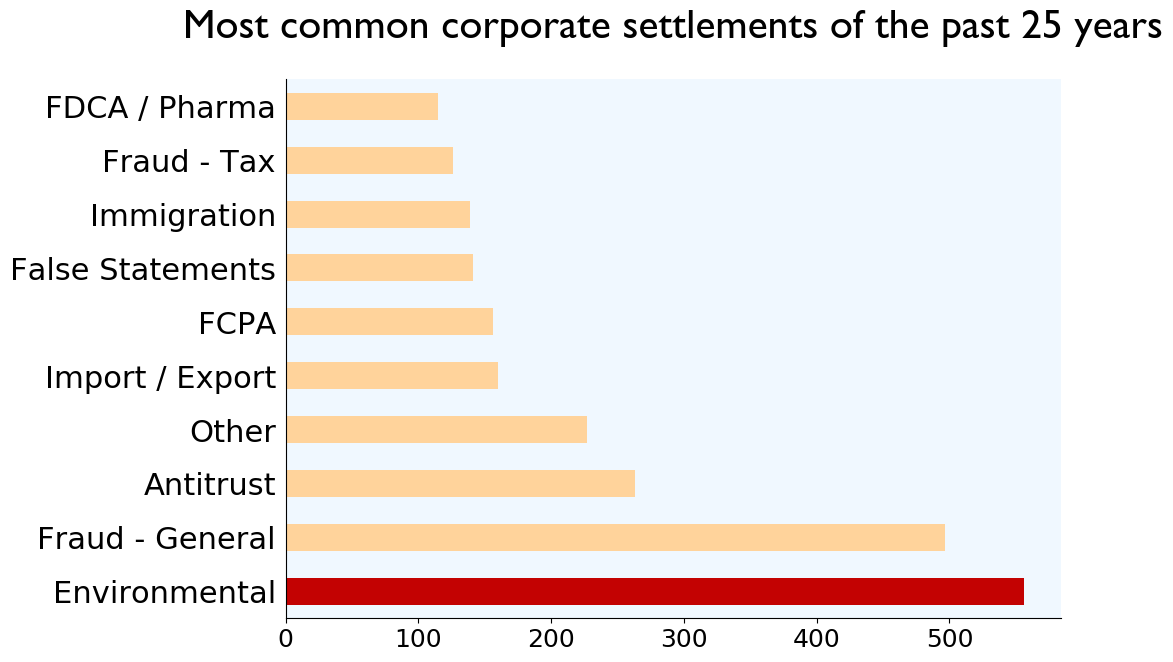

In [54]:
colours = ['#C30202', '#ffd39b', '#ffd39b', '#ffd39b', '#ffd39b', '#ffd39b', '#ffd39b', '#ffd39b', '#ffd39b', '#ffd39b']
ax = crime_types.plot(kind='barh', x='index', y='PRIMARY_CRIME_CODE', color= colours, figsize=(10,7), legend=False)



ax.set_title ('Most common corporate settlements of the past 25 years', pad = 30)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

#plt.gcf().text(0.5, 0.92, "Hectares burnt, by country", ha='center', fontsize=15)

plt.xticks(size = 18)
plt.yticks(size = 22)

ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=True, grid_alpha=0.5)
ax.set_facecolor('#f0f8ff')

#ax.grid(True, axis='x', color='black', linestyle='--', lw=0.5, alpha=0.5)
ax.set_axisbelow(False)
#ax.set_xlim(0, 10)
ax.yaxis.label.set_visible(False)


#plt.savefig("graph-bar-5-largest_areas_burnt.pdf", bbox_inches='tight')
plt.show()

In [18]:
companies=corp_crimes.COMPANY.value_counts().head(5).reset_index()
companies.sort_values(by='COMPANY', ascending=True)

index  COMPANY
4                Credit Lyonnais        2
1          Fleet Management Ltd.        3
2                         UBS AG        3
3             Pharmacia & Upjohn        3
0  Evergreen International, S.A.        4

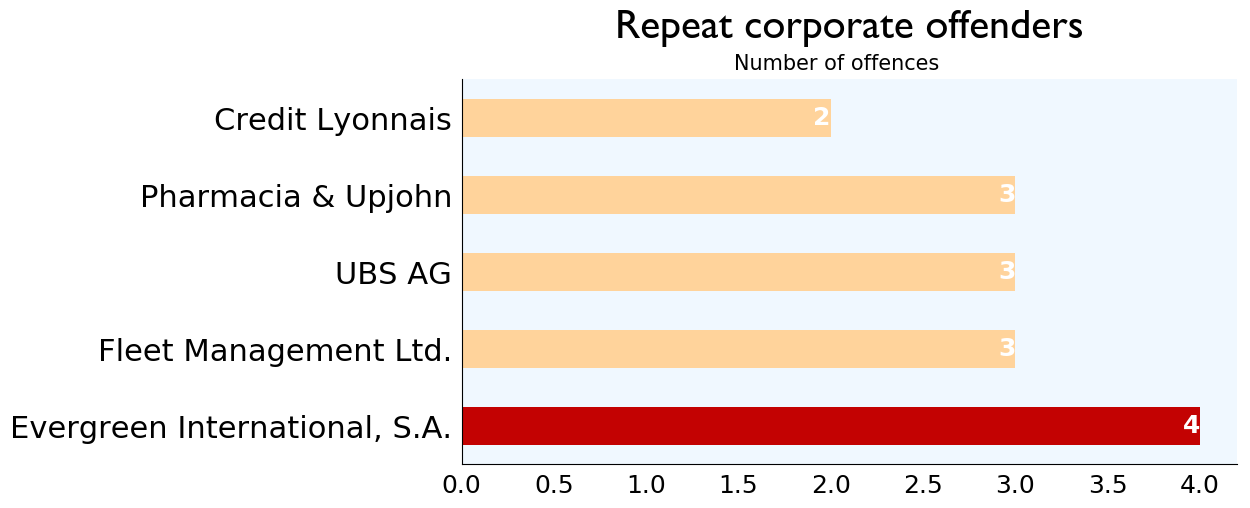

In [62]:
colours = ['#C30202', '#ffd39b', '#ffd39b', '#ffd39b', '#ffd39b']
ax = companies.plot(kind='barh', x='index', y='COMPANY', figsize=(10,5), color=colours, legend=False)

ax.set_title ('Repeat corporate offenders', pad = 30)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

for i, bar in enumerate(ax.patches):
   #print(i)
    x_pos = bar.get_width()
    ax.text(x_pos, i, str(int(round(x_pos))), va= 'center', ha = 'right', color = 'white', fontweight = 'bold', size=18)

plt.gcf().text(0.5, 0.90, "Number of offences", ha='center', fontsize=15)

plt.xticks(size = 18)
plt.yticks(size = 22)

ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)
ax.set_facecolor('#f0f8ff')

#ax.grid(True, axis='x', color='black', linestyle='--', lw=0.5, alpha=0.5)
ax.set_axisbelow(False)
#ax.set_xlim(0, 10)
ax.yaxis.label.set_visible(False)


#plt.savefig("graph-bar-5-largest_areas_burnt.pdf", bbox_inches='tight')
plt.show()

plt.show()

In [71]:
corp_crimes.sort_values('TOTAL_PAYMENT').head(10)

REC_ID                                       COMPANY DISPOSITION_TYPE  \
1268    1485           Greybor Medical Transportation Inc.             plea   
1938    1847                            Monroe Retail Inc.             plea   
2967    2399                                  United Corp.             plea   
2968    2400                           United Express Inc.             plea   
1937    2729                 Monfort Food Distribution Co.               NP   
556      205  Cambridge Environmental & Construction Corp.             plea   
267      956                                   Asdico Inc.             plea   
266     2717                               Arthur Anderson               DP   
1127    1405                      Forsyth Enterprises Inc.             plea   
560      586            Canadian Imperial Bank of Commerce               DP   

                            PRIMARY_CRIME_CODE SWISS_BANK_PROGRAM  \
1268                       Fraud - Health Care                NaN   
1938                          Bank Secrecy Act                NaN   
2967                          Money Laundering                NaN   
2968                          Money Laundering                NaN   
1937                                       NaN                 No   
556                            Fraud - General                NaN   
267   Controlled substances / Drugs / Meth Act                NaN   
266                            Fraud - General                 No   
1127                           Fraud - General                NaN   
560                         Fraud - Accounting                 No   

                                           JURISDICTION        COUNTRY  \
1268  USDOJ - Criminal Division (California - Centra...  United States   
1938                           Ohio - Northern District  United States   
2967                USDOJ - Tax Division,Virgin Islands  United States   
2968                        Florida - Southern District  United States   
1937                        Arkansas - Eastern District  United States   
556               USDOJ - Antitrust Division (New York)  United States   
267                         New York - Western District  United States   
266                                         Connecticut  United States   
1127                        Virginia - Western District  United States   
560                            USDOJ - Enron Task Force         Canada   

     FINANCIAL_INSTITUTION                                       CASE_NAME  \
1268                    No                             USA v. Shpirt et al   
1938                    No  United States of America v. Monroe Retail Inc.   
2967                    No         USA v. Mohamad Yusuf Fathi Yusuf et al.   
2968                    No                              USA v. Puche et al   
1937                    No                                             NaN   
556                     No                              USA v. Yaron et al   
267                     No                             USA v. Scheur et al   
266                     No                                             NaN   
1127                    No                            USA v. Forsyth et al   
560                    Yes                                             NaN   

            CASE_ID                        ...                          \
1268  2:02-cr-00485                        ...                           
1938  3:07-cr-00372                        ...                           
2967  1:05-cr-00015                        ...                           
2968  1:00-cr-00933                        ...                           
1937            NaN                        ...                           
556   1:10-cr-00363                        ...                           
267   1:04-cr-00127                        ...                           
266             NaN                        ...                           
1127  3:00-cr-00039                 